In [2]:
"""
Data Preprocessing
"""

import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# read train data
file_dir = '/Users/dnhb/PycharmProjects/SML_Ass1'
file_name = "train.txt"

def parse(data:list)->list: 
    # Python Notation: https://www.python.org/dev/peps/pep-3107/
    """
    Prase each line of the data
    Return a nested list, such as [[id1, id2, id2,...],...]
    """
    parsed_data = []
    for line in data:
        # remove \n at the end of each line
        line = re.sub(r"(?<=\d)\n", "", line)
        # split IDs by \t
        pattern = re.compile("(?<=\d)\t(?=\d)")
        line = re.split(pattern, line)
        parsed_data.append(line)
    return parsed_data

with open(os.path.join(file_dir, file_name)) as f:
    train_set = f.readlines()
    train_set = parse(train_set)
    
# read test data
test_name = "test-public.txt"
with open(os.path.join(file_dir, test_name)) as f:
    test_set = f.readlines()
    test_set = parse(test_set)
    test_set.pop(0)

# turn ID into int
for i in range(0, len(test_set)):
    test_set[i][0] = int(test_set[i][0])
    
print("Data has been read.")

Data has been read.


In [2]:
"""
Sigma Data For Similarity
"""

from collections import defaultdict

train_dic = {}
for item in train_set:
    train_dic[item[0]] = item[1:]

# construct SigmaOut dic for each node
SigmaOut = defaultdict(set)

def getSigmaOut(node:str, graph:dict) -> set:
    SigmaOut = set()
    try:
        for item in graph[node]:
            SigmaOut.add(item)
        return SigmaOut
    except:
        return SigmaOut

for kw in train_dic:
    SigmaOut[kw] = getSigmaOut(kw, train_dic)
    
print("SigmaOut done.\n")

# construct SigmaIn dic for each node
SigmaIn = defaultdict(set)

for kw in train_dic:
    for followee in train_dic[kw]:
        if SigmaIn[followee]:
            SigmaIn[followee].add(kw)
        else:
            SigmaIn[followee] = {kw}

def getSigma(node:str) -> set:
    return SigmaIn[node].union(SigmaOut[node])

print("SigmaIn done.")

SigmaOut done.

SigmaIn done.


In [3]:
"""
Similarity Functions
"""

import math

    
def adar1(a:str, b:str) -> float:
    score = 0
    SigmaA = getSigma(a)
    SigmaB = getSigma(b) 
    SigmaV = SigmaA.intersection(SigmaB)
    if SigmaV:
        for v in SigmaV:
            if getSigma(v) and len(getSigma(v)) != 1:
                   score += (1/math.log(len(getSigma(v))))
            else:
                   pass
        return score
    else:
        return 0

def adar2(a:str, b:str) -> float:
    score = 0
    SigmaOutA = SigmaOut[a]
    if SigmaOutA:
        for node in SigmaOutA:
            score += adar1(b, node)
        return float(score/len(SigmaOutA))
    else:
        return 0
    
def adar3(a:str, b:str) -> float:
    score = 0
    SigmaInB = SigmaIn[b]
    if SigmaInB:
        for node in SigmaInB:
            score += adar1(a, node)
        return float(score/len(SigmaInB))
    else:
        return 0
  
def jaccard1(a:str, b:str) -> float:
    SigmaA = getSigma(a)
    SigmaB = getSigma(b)
    return float(len(SigmaA.intersection(SigmaB)) / len(SigmaA.union(SigmaB)))

def jaccard2(a:str, b:str) -> float:
    score = 0
    SigmaOutA = SigmaOut[a]
    if SigmaOutA:
        for node in SigmaOutA:
            score += jaccard1(b, node)
        return float(score/len(SigmaOutA))
    else:
        return 0

def jaccard3(a:str, b:str) -> float:
    score = 0
    SigmaInB = SigmaIn[b]
    if SigmaInB:
        for node in SigmaInB:
            score += jaccard1(a, node)
        return float(score/len(SigmaInB))
    else:
        return 0
    
def cosine1(a:str, b:str) -> float:
    SigmaA = getSigma(a)
    SigmaB = getSigma(b)
    return float(len(SigmaA.intersection(SigmaB)) / (len(SigmaA)*len(SigmaB)))


def cosine2(a:str, b:str) -> float:
    score = 0
    SigmaOutA = SigmaOut[a]
    if SigmaOutA:
        for node in SigmaOutA:
            score += cosine1(b, node)
        return float(score/len(SigmaOutA))
    else:
        return 0

def cosine3(a:str, b:str) -> float:
    score = 0
    SigmaInB = SigmaIn[b]
    if SigmaInB:
        for node in SigmaInB:
            score += cosine1(a, node)
        return float(score/len(SigmaInB))
    else:
        return 0

def common_neighbors1(a: str, b: str) -> float:
    SigmaA = getSigma(a)
    SigmaB = getSigma(b)
    return len(SigmaA.intersection(SigmaB))

def common_neighbors2(a: str, b: str) -> float:
     score = 0
     SigmaOutA = SigmaOut[a]
     if SigmaOutA:
         for node in SigmaOutA:
             score += common_neighbors1(b, node)
         return float(score / len(SigmaOutA))
     else:
         return 0

def common_neighbors3(a: str, b: str) -> float:
     score = 0
     SigmaInB = SigmaIn[b]
     if SigmaInB:
         for node in SigmaInB:
             score += common_neighbors1(a, node)
         return float(score / len(SigmaInB))
     else:
         return 0

def knn1(a:str, b:str) -> float:
    """
    knn1 = $w_{ab} = w_a^out$
    """
    return 1/math.sqrt(1+len(SigmaOut[a]))

def knn2(a:str, b:str) -> float:
    """
    knn2 = $w_{ab} = w_b^in$
    """
    return 1/math.sqrt(1+len(SigmaIn[b]))

def knn3(a:str, b:str) -> float:
    """
    knn3 = $w_{ab} = w_a^out  w_b^in$
    """
    return 1/math.sqrt(1+len(SigmaOut[a])) + 1/math.sqrt(1+len(SigmaIn[b]))

def knn4(a:str, b:str) -> float:
    """
    knn4 = $w_{ab} = w_a^out * w_b^in$
    """
    wAOut = 1/math.sqrt(1+len(SigmaOut[a]))
    wBIn = 1/math.sqrt(1+len(SigmaIn[b]))
    return  wAOut* wBIn

In [4]:
"""
This cell only works when reading data from local 
"""

# read X_train data
score_name = "X_trainScore.csv"
with open(os.path.join(file_dir, score_name)) as f:
    X_train = f.readlines()
    X_train = parse(X_train)
    X_train.pop(0)
    
for i in range(0, len(X_train)):
    X_train[i] = X_train[i][0].split(",")
    for j in range(0, 7):
        X_train[i][j] = float(X_train[i][j])
        
# read X_test data
score_name = "X_testScore.csv"
with open(os.path.join(file_dir, score_name)) as f:
    X_test = f.readlines()
    X_test = parse(X_test)
    X_test.pop(0)
    
for i in range(0, len(X_test)):
    X_test[i] = X_test[i][0].split(",")
    for j in range(0, 7):
        X_test[i][j] = float(X_test[i][j])
        
# read test data
score_name = "TestScore.csv"
with open(os.path.join(file_dir, score_name)) as f:
    testScore = f.readlines()
    testScore = parse(testScore)
    testScore.pop(0)
    
for i in range(0, len(testScore)):
    testScore[i] = testScore[i][0].split(",")
    for j in range(0, 7):
        testScore[i][j] = float(testScore[i][j])

# construct Y
positive_label = [1] * 10000
negative_label = [0] * 10000
Y_train = []
Y_train.extend(positive_label)
Y_train.extend(negative_label)

# construct Y_test
positive_label = [1] * 2500
negative_label = [0] * 2500
Y_test = []
Y_test.extend(positive_label)
Y_test.extend(negative_label)

"""
Step:
1. run this cell
2. run the *assert block*

if need to select feature, then
1. run the X_trian1 cell, select the features
2. edit and run *getFeature* cell
3. run the paparmeters of RF
4. gridsearch and so on 
"""

'\nStep:\n1. run this cell\n2. run the *assert block*\n\nif need to select feature, then\n1. run the X_trian1 cell, select the features\n2. edit and run *getFeature* cell\n3. run the paparmeters of RF\n4. gridsearch and so on \n'

In [5]:
assert(len(X_train) == len(Y_train))
assert(len(X_test) == len(Y_test))

In [87]:
len(testScore[0])-1 == len(X_train[0])

True

In [6]:
"""
Select Features
"""

# "adar1",  "jaccard2", "jaccard3", "cosine2", "cosine3"
X_train1 = []
for item in X_train:
    new = []
    new.extend(item[:4])
    #new.extend(item[2:4])
    #new.extend(item[5:])
    X_train1.append(new)
    
X_train = X_train1

X_test1 = []
for item in X_test:
    new = []
    new.extend(item[:4])
    #new.extend(item[2:4])
    #new.extend(item[5:])
    X_test1.append(new)
    
X_test = X_test1

testScore1 = []
for item in testScore:
    new = []
    new.extend(item[:4])
    #new.extend(item[2:4])
    #new.extend(item[5:])
    testScore1.append(new)
    
testScore = testScore1

In [5]:
"""
Get Feature
"""

def getFeature(pair:tuple) -> float:
    node1 = pair[0]
    node2 = pair[1]
    result = []
    result.append(adar1(node1,node2))
    #result.append(salton(node1,node2))
    #result.append(allocation(node1,node2))
    result.append(jaccard1(node1,node2))
    result.append(jaccard2(node1,node2))
    result.append(jaccard3(node1,node2))
    result.append(cosine1(node1,node2))
    result.append(cosine2(node1,node2))
    result.append(cosine3(node1,node2))
    result.append(knn1(node1,node2))
    result.append(knn2(node1,node2))
    result.append(knn3(node1,node2))
    result.append(knn4(node1,node2))
    result.append(common_neighbors1(node1,node2))
    result.append(common_neighbors2(node1,node2))
    result.append(common_neighbors3(node1,node2))
    #result.append(AA(node1,node2))
    #result.append(CNPA(node1,node2))
    print(result)
    return result

Fitting 3 folds for each of 2800 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 57.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 72.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 94.1min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 119.4min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 140.2min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 166.5min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 195.8min
[Parallel(n_jobs=-1)]: Done 8400 out of 840

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
rfc train success!


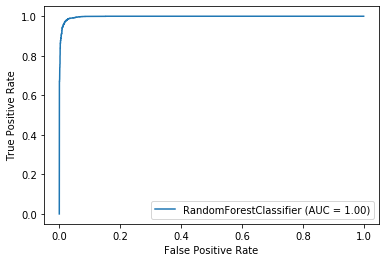

0.9996

In [27]:
"""
Train RandomForestClassifier
Using GridSearchCV to find the best estimators
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Create the random grid for rfc
para_rfc = {'n_estimators': [300, 500, 700, 900],
                 "criterion": ["gini", "entropy"],
                 'max_depth': [5, 6, 7, 8, 9, 10, None],
                 'min_samples_split': [2, 3, 4, 5, 6],
                 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

rfc = RandomForestClassifier(bootstrap=True, criterion='gini',
           max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_weight_fraction_leaf=0.0, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False )
grid_rfc = GridSearchCV(estimator = rfc, param_grid = para_rfc, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
grid_rfc.fit(X_train, Y_train)
model = grid_rfc.best_estimator_
model.fit(X_train, Y_train)
print (model)
print ("rfc train success!")

#plot the ROC
metrics.plot_roc_curve(model, X_test, Y_test) 
plt.show()
model.score(X_test, Y_test)

rfc train success!


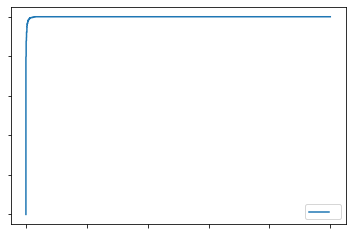

In [70]:
"""
Best estimators of RFC with features adar1, jaccard 1-3, cos 1-3
"""

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

model.fit(X_train, Y_train)
print ("rfc train success!")
metrics.plot_roc_curve(model, X_test, Y_test) 
plt.show()

rfc train success!


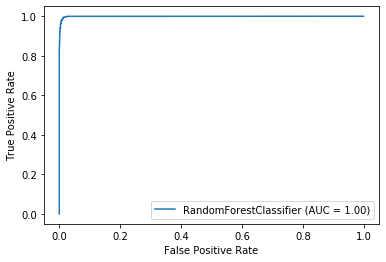

In [5]:
"""TRY Best"""

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
model.fit(X_train, Y_train)
print ("rfc train success!")
metrics.plot_roc_curve(model, X_test, Y_test) 
plt.show()

In [44]:
import random
random.seed(0)
X_train = random.sample(X_train, 100) 

random.seed(0)
Y_train = random.sample(Y_train, 100) 

In [ ]:
from sklearn import model_selection

In [ ]:
"""
Train Support Vector Classification
Using GridSearchCV to find the best estimators
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

para_svc = {"C": [1, 3, 5],
               "kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}

svc = RandomForestClassifier(bootstrap=True, criterion='gini',
           max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_weight_fraction_leaf=0.0, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False )
grid_svc = GridSearchCV(estimator = svc, param_grid = para_svc, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
grid_svc.fit(X_train, Y_train)
model = grid_svc.best_estimator_
model.fit(X_train, Y_train)
print (model)
print ("svc train success!")

In [8]:
"""
Train LogisticRegression
Using GridSearchCV to find the best estimators
"""

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create the random grid for rfc
para_lgr = {'penalty': ["l1", "l2", "elasticnet", "none"],
                 'tol': [1e-4, 1e-6, 1e-8, 1e-9],
                 'C': [1],
                 'fit_intercept': [True],
                 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'max_iter': [100, 200, 300, 500, 1000],
                 'multi_class': ['auto'],
                 'n_jobs': [1]}    

lgr = LogisticRegression(random_state=0)
grid_lgr = GridSearchCV(estimator = lgr, param_grid = para_lgr, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
grid_lgr.fit(X_train, Y_train)
model = grid_lgr.best_estimator_
model.fit(X_train, Y_train)
print (model)
print ("lgr train success!")
metrics.plot_roc_curve(model, X_test, Y_test) 
plt.show()

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/dnhb/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/resource_tracker.py:101: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some folders/sempahores might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '
exception calling callback for <Future at 0x7fefc20ef990 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/dnhb/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/dnhb/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/Users/dnhb/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Users/dnhb/opt/anaconda3/lib/python3.7/sit

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [64]:
"""
Best estimators of LGR with features adar1, jaccard 1-3, cos 1-3
"""

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=1, penalty='none', random_state=0,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
model.fit(X_train, Y_train)
metrics.plot_roc_curve(model, X_test, Y_test) 
plt.show()

/Users/dnhb/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/dnhb/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/dnhb/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/dnhb/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/dnhb/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The l

UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [57]:
for i in range(0, len(X_train)):
    for j in range(0, len(X_test)):
        if X_train[i] == X_test[j]:
            print(i, X_train[i])
            print(j, X_test[j], '\n')
            break
        else:
            pass
print("done")

10026 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.134839972', '0.707106781', '0.841946754', '0.095346259', '0', '0', '0']
4761 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.134839972', '0.707106781', '0.841946754', '0.095346259', '0', '0', '0'] 

10104 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.25', '0.707106781', '0.957106781', '0.176776695', '0', '0', '0']
2975 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.25', '0.707106781', '0.957106781', '0.176776695', '0', '0', '0'] 

10218 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.5', '0.707106781', '1.207106781', '0.353553391', '0', '0', '0']
4966 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.5', '0.707106781', '1.207106781', '0.353553391', '0', '0', '0'] 

10238 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.377964473', '1.085071254', '0.267261242', '0', '0', '0']
4104 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.377964473', '1.085071254', '0.267261242', '0', '0', '0'] 

10263 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.577350269', '1.28445705', '0.4

12294 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.15249857', '0.707106781', '0.859605352', '0.107832773', '0', '0', '0']
2835 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.15249857', '0.707106781', '0.859605352', '0.107832773', '0', '0', '0'] 

12381 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '1', '0.223606798', '1.223606798', '0.223606798', '0', '0', '0']
3725 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '1', '0.223606798', '1.223606798', '0.223606798', '0', '0', '0'] 

12577 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.707106781', '1.414213562', '0.5', '0', '0', '0']
4100 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.707106781', '1.414213562', '0.5', '0', '0', '0'] 

12608 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.577350269', '1.28445705', '0.40824829', '0', '0', '0']
3360 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.577350269', '1.28445705', '0.40824829', '0', '0', '0'] 

12616 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.179605302', '0.707106781', '0.886712083', '0.127000127', 

15074 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.707106781', '1.414213562', '0.5', '0', '0', '0']
4100 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.707106781', '1.414213562', '0.5', '0', '0', '0'] 

15097 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '1', '0.5', '1.5', '0.5', '0', '0', '0']
3095 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '1', '0.5', '1.5', '0.5', '0', '0', '0'] 

15222 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.577350269', '1.28445705', '0.40824829', '0', '0', '0']
3360 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.577350269', '1.28445705', '0.40824829', '0', '0', '0'] 

15258 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.316227766', '0.707106781', '1.023334547', '0.223606798', '0', '0', '0']
2979 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.316227766', '0.707106781', '1.023334547', '0.223606798', '0', '0', '0'] 

15261 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.447213595', '0.577350269', '1.024563865', '0.25819889', '0', '0', '0']
3139 [0.0, 0.0, 0.0, 0.0, 0.0, 0

17171 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '1', '0.377964473', '1.377964473', '0.377964473', '0', '0', '0']
3612 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '1', '0.377964473', '1.377964473', '0.377964473', '0', '0', '0'] 

17205 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.090909091', '0.707106781', '0.798015872', '0.064282435', '0', '0', '0']
2878 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.090909091', '0.707106781', '0.798015872', '0.064282435', '0', '0', '0'] 

17225 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.707106781', '1.414213562', '0.5', '0', '0', '0']
4100 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.707106781', '1.414213562', '0.5', '0', '0', '0'] 

17283 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.577350269', '1.28445705', '0.40824829', '0', '0', '0']
3360 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.577350269', '1.28445705', '0.40824829', '0', '0', '0'] 

17315 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.447213595', '0.577350269', '1.024563865', '0.25819889',

19407 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.5', '0.707106781', '1.207106781', '0.353553391', '0', '0', '0']
4966 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.5', '0.707106781', '1.207106781', '0.353553391', '0', '0', '0'] 

19408 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.21821789', '0.707106781', '0.925324671', '0.15430335', '0', '0', '0']
4458 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.21821789', '0.707106781', '0.925324671', '0.15430335', '0', '0', '0'] 

19706 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.25819889', '0.965305671', '0.182574186', '0', '0', '0']
3775 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.707106781', '0.25819889', '0.965305671', '0.182574186', '0', '0', '0'] 

19730 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.277350098', '0.707106781', '0.984456879', '0.196116135', '0', '0', '0']
3554 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.277350098', '0.707106781', '0.984456879', '0.196116135', '0', '0', '0'] 

19759 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '1', '0.707106781', '1.707106781', '0.70

In [7]:
import multiprocessing as mp
import time

if __name__ == '__main__':
    
    def getPro(record:list) -> list:
        feature = testScore[record[0]-1][1:]
        prediction = model.predict_proba([feature])[0][1]
        #label = model.predict([feature])[0]
        pro = [record[0], prediction]
        print(pro)
        return pro
    
    # construct the # of pools corresponding to the cpu_count in ur PC
    pool = mp.Pool(mp.cpu_count())
    
    startTime = time.time()

    result = pool.map(getPro, test_set)
    pool.close()
    pool.join()
    
    endTime = time.time()
    print("Total time:" + (endTime - startTime).__str__())
    
    title = ["Id", "Predicted"]
    test_pd = pd.DataFrame(columns = title, data = result)
    test_pd.to_csv('/Users/dnhb/PycharmProjects/SML_Ass1/idk.csv',encoding='utf-8')

[1, 0.0]
[190, 0.0]
[379, 0.002888888888888889]
[64, 0.006388888888888888]
[253, 0.7738055555555556]
[127, 0.05461904761904763]
[316, 0.0]
[65, 0.5346269841269843]
[2, 0.0]
[380, 0.35532407407407407]
[128, 0.0]
[191, 0.0033333333333333335]
[317, 0.04833333333333333]
[254, 0.9956349206349205]
[381, 0.0]
[129, 0.0]
[192, 0.8127579365079366]
[3, 0.045325396825396824]
[66, 0.0]
[255, 0.0]
[318, 0.9731984126984128]
[193, 0.01125]
[130, 0.0]
[4, 0.0]
[67, 0.0]
[382, 1.0]
[319, 0.8485753968253968]
[256, 0.07343253968253968]
[68, 0.0]
[194, 0.09173544973544973]
[131, 0.0]
[5, 0.0]
[383, 0.9815873015873016]
[320, 0.0033333333333333335]
[257, 0.0]
[195, 0.6602777777777779]
[69, 0.0033333333333333335]
[132, 0.896126984126984]
[6, 0.0]
[384, 0.9244444444444446]
[321, 0.0011111111111111111]
[258, 1.0]
[196, 0.9966666666666667]
[133, 0.0027777777777777775]
[7, 0.0]
[70, 0.0]
[385, 0.0044444444444444444]
[322, 0.0]
[259, 0.0]
[71, 0.0]
[8, 0.0]
[134, 0.9699007936507937]
[197, 0.0]
[323, 0.00333333333

[441, 0.0]
[442, 0.0]
[315, 0.20220634920634925]
[505, 0.6144444444444445]
[568, 0.2147222222222223]
[694, 0.0]
[631, 0.9844444444444443]
[443, 0.0]
[820, 0.933601851851852]
[506, 0.9023492063492065]
[757, 0.9786666666666668]
[569, 0.5884246031746032]
[695, 0.003888888888888889]
[632, 0.0]
[821, 0.5238518518518519]
[758, 0.0]
[444, 0.7361666666666666]
[570, 0.13806746031746034]
[696, 0.04622222222222222]
[507, 0.005]
[633, 0.041666666666666664]
[822, 0.0]
[445, 0.033888888888888885]
[759, 0.021785714285714287]
[508, 0.0]
[571, 0.07742063492063492]
[697, 0.9736944444444445]
[634, 0.5456891534391534]
[509, 0.0]
[823, 1.0]
[760, 0.0033333333333333335]
[446, 0.0]
[572, 0.4500833333333333]
[698, 0.0]
[635, 0.2550211640211641]
[761, 0.0]
[824, 0.0]
[510, 0.0]
[573, 0.0]
[447, 0.0]
[699, 0.8215595238095238]
[636, 0.0033333333333333335]
[825, 0.0]
[762, 0.9961111111111111]
[511, 0.0]
[448, 0.0]
[574, 1.0]
[700, 0.0]
[637, 0.015158730158730158]
[763, 0.0]
[826, 0.5045119047619048]
[449, 0.0]
[5

[880, 0.008333333333333333]
[755, 0.5620793650793652]
[692, 0.0]
[818, 0.8568703703703704]
[881, 0.0]
[504, 0.0]
[630, 0.0]
[883, 0.7621851851851851]
[756, 0.0033333333333333335]
[819, 0.0]
[693, 0.9983333333333333]
[1009, 0.9099126984126985]
[882, 0.04633333333333334]
[946, 0.010222222222222221]
[1135, 0.9722222222222221]
[884, 0.9791111111111112]
[1072, 0.09726984126984128]
[1010, 0.09675396825396824]
[1198, 0.0]
[1261, 0.02222222222222222]
[885, 0.0]
[947, 0.0]
[1136, 0.7557261904761904]
[1073, 0.09472222222222222]
[1199, 0.2926190476190476]
[1011, 0.08308333333333334]
[948, 0.5663888888888889]
[1262, 0.6430529100529101]
[886, 0.008444444444444444]
[1074, 0.0]
[1137, 0.9376825396825397]
[1200, 0.0]
[1263, 0.09743650793650793]
[1012, 0.0]
[949, 0.6840277777777777]
[887, 0.013333333333333334]
[1138, 0.0033333333333333335]
[1201, 0.0]
[1075, 0.0]
[1264, 0.0]
[1013, 0.0]
[950, 0.009333333333333332]
[888, 0.02038888888888889]
[1139, 0.0]
[1076, 0.5882407407407406]
[1202, 0.51588888888888

[1003, 1.0]
[1255, 0.0]
[941, 0.1046904761904762]
[1129, 0.9265555555555555]
[1192, 0.0]
[1067, 0.0]
[1318, 0.1376111111111111]
[1004, 0.0]
[942, 0.8696349206349206]
[1130, 0.0]
[1256, 0.0]
[1193, 0.8599841269841271]
[1068, 0.14055555555555554]
[1319, 0.9856428571428573]
[1005, 0.9321111111111111]
[943, 0.992111111111111]
[1257, 0.5340873015873016]
[1131, 0.0]
[1194, 0.8062857142857143]
[1069, 0.008333333333333333]
[1320, 0.0]
[1006, 0.9784126984126984]
[1132, 0.014126984126984127]
[944, 0.0013333333333333335]
[1258, 0.8659999999999999]
[1195, 0.7033887686387686]
[1070, 0.0033333333333333335]
[1321, 0.0006666666666666668]
[1007, 0.0]
[1259, 0.0]
[945, 0.0]
[1133, 0.0]
[1196, 0.0]
[1071, 0.0]
[1322, 0.0]
[1008, 0.0]
[1260, 0.6395317460317461]
[1134, 0.9716666666666665]
[1197, 0.0]
[1324, 0.0]
[1387, 0.9245000000000001]
[1323, 0.0]
[1450, 0.0]
[1639, 0.0]
[1576, 1.0]
[1325, 0.0]
[1513, 0.0]
[1388, 0.0]
[1702, 0.0]
[1451, 0.0]
[1514, 0.9564523809523808]
[1640, 0.0]
[1326, 0.45728968253968

[1439, 0.0]
[1565, 0.2460238095238095]
[1753, 0.7867460317460317]
[1377, 0.006666666666666667]
[1502, 0.0]
[1628, 0.0]
[1691, 0.9436111111111111]
[1440, 0.7325013227513227]
[1754, 0.9793015873015872]
[1566, 0.0]
[1378, 0.0]
[1503, 0.0]
[1692, 0.0]
[1629, 0.2492619047619047]
[1441, 0.00857142857142857]
[1755, 0.011666666666666667]
[1567, 0.255984126984127]
[1379, 0.0]
[1693, 0.5055158730158729]
[1504, 0.1965714285714286]
[1630, 0.34033862433862433]
[1442, 0.0688373015873016]
[1756, 0.0025]
[1568, 0.9737777777777777]
[1380, 0.12419841269841271]
[1694, 0.0]
[1505, 0.5451666666666667]
[1631, 0.12574603174603174]
[1443, 0.9470000000000001]
[1757, 0.050666666666666665]
[1569, 0.039912698412698414]
[1381, 0.0]
[1695, 0.2044444444444444]
[1506, 0.0]
[1632, 0.0]
[1444, 0.009960317460317461]
[1758, 0.8353941798941799]
[1382, 0.9773809523809522]
[1696, 0.0]
[1570, 0.0]
[1507, 0.9202222222222224]
[1633, 0.0]
[1759, 0.5099523809523809]
[1445, 0.9749126984126986]
[1697, 0.0]
[1508, 0.003333333333333